# COVID Cases, Hospitalizations, and Deaths by Age, Sex, Race, and Date.
#### Data acquired from [opendataphilly.org](www.opendataphilly.org).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

## Cases by Age/Sex

In [2]:
cases_age = pd.read_csv('./covid_cases_by_age.csv')
cases_age

,the_geom,the_geom_webmercator,age,count,etl_timestamp
0,NaN,NaN,20-34,11224,2020-10-10 17:20:02
1,NaN,NaN,55-74,9172,2020-10-10 17:20:02
2,NaN,NaN,75+,3599,2020-10-10 17:20:02
3,NaN,NaN,<20,3105,2020-10-10 17:20:02
4,NaN,NaN,35-54,11641,2020-10-10 17:20:02


In [3]:
# Reorder the ages youngest to oldest
cases_age = cases_age.loc[[3, 0, 4, 1, 2], :]

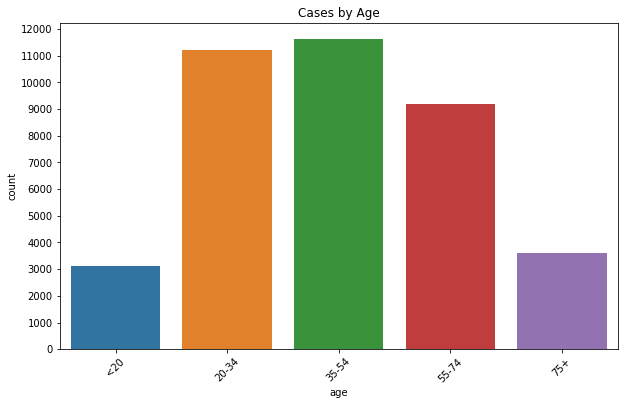

In [4]:
ages = [i for i in cases_age['age']]
plt.figure(figsize=(10,6))
plt.title('Cases by Age')
case_age_plot = sns.barplot(x='age', y='count', data=cases_age)
case_age_plot.set(yticks=np.arange(0, 12001, 1000))
case_age_plot.set_xticklabels(ages, rotation=45)
plt.show()

In [5]:
cases_sex = pd.read_csv('./covid_cases_by_sex.csv')
cases_sex

,the_geom,the_geom_webmercator,sex,count,etl_timestamp
0,NaN,NaN,Female,21177,2020-10-10 17:20:02
1,NaN,NaN,Male,17269,2020-10-10 17:20:02
2,NaN,NaN,UNKNOWN,321,2020-10-10 17:20:02


In [6]:
# Make 'UNKNOWN' casing consistent with other responses
cases_sex.loc[cases_sex['sex'] == 'UNKNOWN', ['sex']] = 'Unknown'

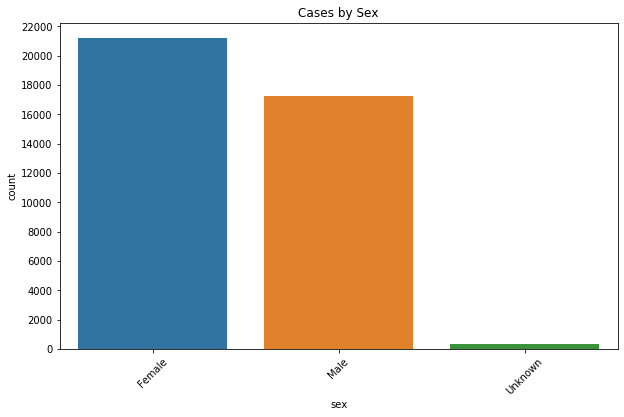

In [7]:
sexes = [i for i in cases_sex['sex']]
plt.figure(figsize=(10,6))
plt.title('Cases by Sex')
case_sex_plot = sns.barplot(x='sex', y='count', data=cases_sex)
case_sex_plot.set(yticks=np.arange(0, 22001, 2000))
case_sex_plot.set_xticklabels(sexes, rotation=45)
plt.show()

## Hospitalizations by Age/Sex

In [8]:
hosp_age = pd.read_csv('./covid_hospitalizations_by_age.csv')
hosp_age

,age,hospitalized,count,etl_timestamp
0,<20,Yes,123,2020-10-10 17:20:02
1,75+,NO_UNKNOWN,1968,2020-10-10 17:20:02
2,<20,NO_UNKNOWN,2982,2020-10-10 17:20:02
3,55-74,NO_UNKNOWN,6362,2020-10-10 17:20:02
4,35-54,NO_UNKNOWN,10000,2020-10-10 17:20:02
5,55-74,Yes,2810,2020-10-10 17:20:02
6,20-34,NO_UNKNOWN,10461,2020-10-10 17:20:02
7,20-34,Yes,763,2020-10-10 17:20:02
8,35-54,Yes,1641,2020-10-10 17:20:02
9,75+,Yes,1631,2020-10-10 17:20:02


In [9]:
# Make 'NO_UNKNOWN' more presentable and consistent with other responses
hosp_age.loc[hosp_age['hospitalized'] == 'NO_UNKNOWN', ['hospitalized']] = 'No_or_Unk'

In [10]:
# Set and reorder ages younges to oldest
ages_order = ['<20', '20-34', '35-54', '55-74', '75+']
hosp_age['age'] = pd.Categorical(hosp_age['age'], categories=ages_order, ordered=True)

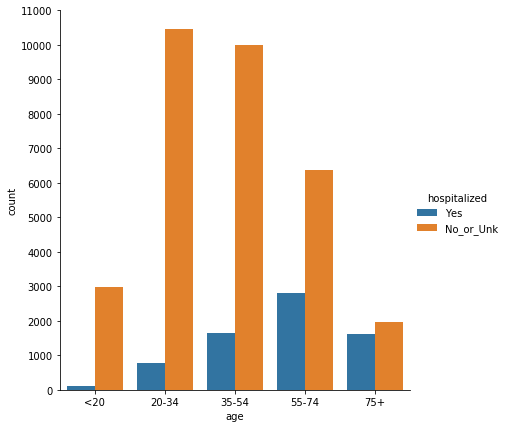

In [11]:
hosp_age_plot = sns.catplot(x = "age", y = "count", hue = "hospitalized", data=hosp_age, kind = "bar", height=6)
hosp_age_plot.set(yticks = np.arange(0, 11001, 1000))
plt.show() # Seaborn is very strange about adding titles to catplot. I could not figure out an easy way to do it.

In [12]:
hosp_sex = pd.read_csv('./covid_hospitalizations_by_sex.csv')
hosp_sex

,sex,hospitalized,count,etl_timestamp
0,Female,Yes,3443,2020-10-10 17:20:02
1,Male,Yes,3522,2020-10-10 17:20:02
2,Female,NO_UNKNOWN,17734,2020-10-10 17:20:02
3,Male,NO_UNKNOWN,13747,2020-10-10 17:20:02


In [13]:
# Make 'NO_UNKNOWN' more presentable and consistent with other responses
hosp_sex.loc[hosp_sex['hospitalized'] == 'NO_UNKNOWN', ['hospitalized']] = 'No_or_Unk'

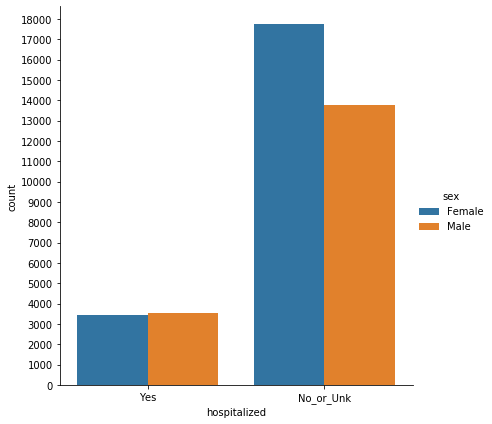

In [14]:
hosp_sex_plot = sns.catplot(x = "hospitalized", y = "count", hue = "sex", data=hosp_sex, kind = "bar", height=6)
hosp_sex_plot.set(yticks = np.arange(0, 18001, 1000))
plt.show()

### Deaths by Age/Sex

In [15]:
age_df = pd.read_csv('./covid_deaths_by_age.csv')
age_df

,gender,age,count,etl_timestamp
0,Male,20-34,9,2020-10-10 17:20:02
1,Male,35-54,83,2020-10-10 17:20:02
2,Female,55-74,281,2020-10-10 17:20:02
3,Female,75+,566,2020-10-10 17:20:02
4,Male,55-74,397,2020-10-10 17:20:02
5,Female,35-54,40,2020-10-10 17:20:02
6,Male,75+,446,2020-10-10 17:20:02


In [16]:
# No entries for 'Female' 'Age = 20-34'. Perhaps no such cases at this time in Philadelphia? Seems hard to believe.
age_df.sort_values('age')

,gender,age,count,etl_timestamp
0,Male,20-34,9,2020-10-10 17:20:02
1,Male,35-54,83,2020-10-10 17:20:02
5,Female,35-54,40,2020-10-10 17:20:02
2,Female,55-74,281,2020-10-10 17:20:02
4,Male,55-74,397,2020-10-10 17:20:02
3,Female,75+,566,2020-10-10 17:20:02
6,Male,75+,446,2020-10-10 17:20:02


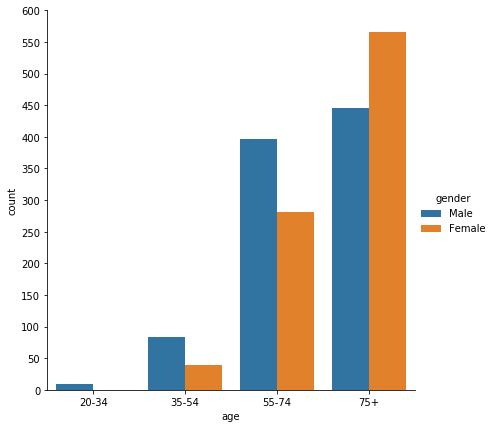

In [17]:
age_plot = sns.catplot(x = "age", y = "count", hue = "gender", data=age_df, kind = "bar", height=6)
age_plot.set(yticks = np.arange(0, 650, 50))
plt.show()

__________________

## Cases by Race

In [60]:
cases_race = pd.read_csv('./covid_cases_by_race.csv')
cases_race

,racial_identity,count,etl_timestamp
0,White,6955,2020-10-10 17:20:02
1,NaN,7467,2020-10-10 17:20:02
2,OTHER,1398,2020-10-10 17:20:02
3,African,9,2020-10-10 17:20:02
4,Pacific Islander,16,2020-10-10 17:20:02
5,Native American,31,2020-10-10 17:20:02
6,UNKNOWN,335,2020-10-10 17:20:02
7,Asian,1267,2020-10-10 17:20:02
8,HISPANIC,5277,2020-10-10 17:20:02
9,African American,16012,2020-10-10 17:20:02


In [61]:
# We'll combine the 'NaN' with 'UNKNOOWN'
# Sort the responses by count and reset the index
cases_race['count'][6] = (cases_race['count'][6] + cases_race['count'][1])
cases_race.drop([1], inplace=True)
cases_race = cases_race.sort_values('count', ascending=False)
cases_race = cases_race.reset_index(drop=True)

/Users/lawrencelove/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
# Fix 'racial_identity' casing inconsitencies.
cases_race['racial_identity'] = cases_race['racial_identity'].str.title()

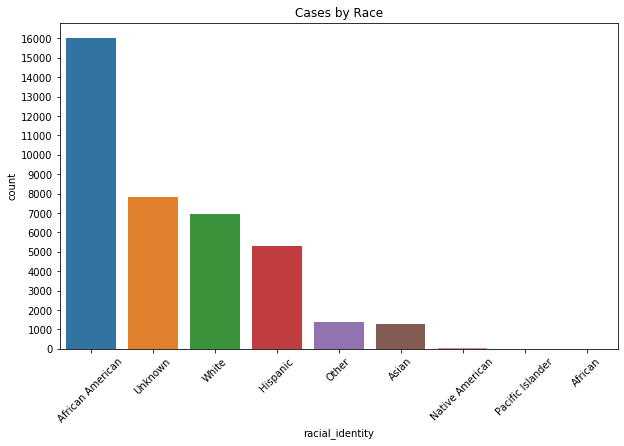

In [78]:
races = [i for i in cases_race['racial_identity']]
plt.figure(figsize=(10,6))
plt.title('Cases by Race')
case_race_plot = sns.barplot(x='racial_identity', y='count', data=cases_race)
case_race_plot.set(yticks = np.arange(0, 16001, 1000))
case_race_plot.set_xticklabels(races, rotation=45)
plt.show()

In [64]:
# Show percentage of cases by Race
cases_race_perc = []
for i in cases_race['count']:
    cases_race_perc.append(round(i / cases_race['count'].sum(),4))

cases_race['percent_of_total_cases'] = cases_race_perc
cases_race[['racial_identity', 'percent_of_total_cases']]

,racial_identity,percent_of_total_cases
0,African American,0.4130
1,Unknown,0.2013
2,White,0.1794
3,Hispanic,0.1361
4,Other,0.0361
5,Asian,0.0327
6,Native American,0.0008
7,Pacific Islander,0.0004
8,African,0.0002


## Hospitalizations by Race

In [65]:
hosp_race = pd.read_csv('./covid_hospitalizations_by_race.csv')
hosp_race

,racial_identity,hospitalized,count,etl_timestamp
0,HISPANIC,Yes,1013,2020-10-10 17:20:02
1,White,Yes,1237,2020-10-10 17:20:02
2,UNKNOWN,NO_UNKNOWN,272,2020-10-10 17:20:02
3,Native American,NO_UNKNOWN,27,2020-10-10 17:20:02
4,Asian,NO_UNKNOWN,1011,2020-10-10 17:20:02
5,AFRICAN AMERICAN,NO_UNKNOWN,12031,2020-10-10 17:20:02
6,White,NO_UNKNOWN,5718,2020-10-10 17:20:02
7,UNKNOWN,Yes,63,2020-10-10 17:20:02
8,AFRICAN AMERICAN,Yes,3981,2020-10-10 17:20:02
9,NaN,Yes,147,2020-10-10 17:20:02


In [66]:
# Fix cases inconsitencies
hosp_race['racial_identity'] = hosp_race['racial_identity'].str.title()
# Make 'NO_UNKNOWN' more presentable with 'No_or_Unk'
hosp_race.loc[hosp_race['hospitalized'] == 'NO_UNKNOWN', ['hospitalized']] = 'No_or_Unk'

In [67]:
# Combine the NaNs with 'UNKNOWN' and confirm total count is the same before and after.
# Sort the responses by count and reset the index
print('Before edits =', hosp_race['count'].sum())
hosp_race['count'][2] = (hosp_race['count'][2] + hosp_race['count'][10])
hosp_race['count'][7] = (hosp_race['count'][7] + hosp_race['count'][9])
hosp_race.drop([9,10], inplace=True)
hosp_race = hosp_race.sort_values('count', ascending=False)
hosp_race = hosp_race.reset_index(drop=True)
print('After edits =', hosp_race['count'].sum())

Before edits = 38767
After edits = 38767


/Users/lawrencelove/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/lawrencelove/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [68]:
hosp_race

,racial_identity,hospitalized,count,etl_timestamp
0,African American,No_or_Unk,12031,2020-10-10 17:20:02
1,Unknown,No_or_Unk,7592,2020-10-10 17:20:02
2,White,No_or_Unk,5718,2020-10-10 17:20:02
3,Hispanic,No_or_Unk,4264,2020-10-10 17:20:02
4,African American,Yes,3981,2020-10-10 17:20:02
5,White,Yes,1237,2020-10-10 17:20:02
6,Other,No_or_Unk,1143,2020-10-10 17:20:02
7,Hispanic,Yes,1013,2020-10-10 17:20:02
8,Asian,No_or_Unk,1011,2020-10-10 17:20:02
9,Other,Yes,264,2020-10-10 17:20:02


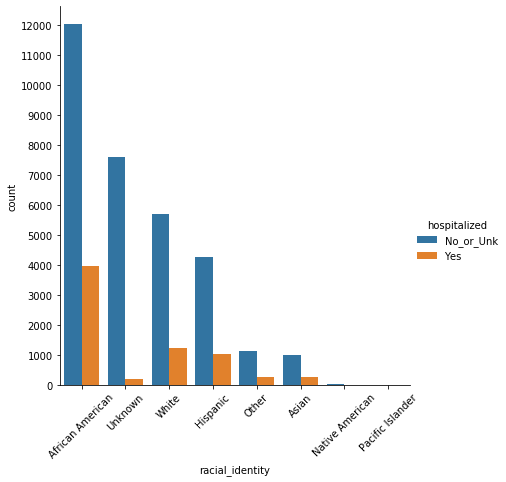

In [69]:
hosp_race_plot = sns.catplot(x = "racial_identity", y = "count", hue = "hospitalized", data=hosp_race, kind = "bar", height=6)
hosp_race_plot.set(yticks = np.arange(0, 12500, 1000))
hosp_race_plot.set_xticklabels(rotation=45)
plt.show()

## Deaths by Race

In [70]:
race_df = pd.read_csv('./covid_deaths_by_race.csv')
race_df

,racial_identity,count,etl_timestamp
0,NaN,105,2020-10-10 17:20:02
1,Asian,62,2020-10-10 17:20:02
2,UNKNOWN,32,2020-10-10 17:20:02
3,AFRICAN AMERICAN,903,2020-10-10 17:20:02
4,Other,50,2020-10-10 17:20:02
5,HISPANIC,164,2020-10-10 17:20:02
6,White,511,2020-10-10 17:20:02


In [73]:
# No real explanation for 'NaN' row here, we'll just combine 'UNKNOWN' with NaN row.
# Fix 'racial_identity' casing inconsitencies.
# Sort the responses by count and reset the index
race_df['racial_identity'] = race_df['racial_identity'].str.title()
race_df['count'][2] = (race_df['count'][2] + race_df['count'][0])
race_df.drop([0], inplace=True)
race_df = race_df.sort_values('count', ascending=False)
race_df = race_df.reset_index(drop=True)
race_df

/Users/lawrencelove/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,racial_identity,count,etl_timestamp
0,African American,965,2020-10-10 17:20:02
1,White,511,2020-10-10 17:20:02
2,Hispanic,164,2020-10-10 17:20:02
3,Unknown,137,2020-10-10 17:20:02
4,Other,50,2020-10-10 17:20:02


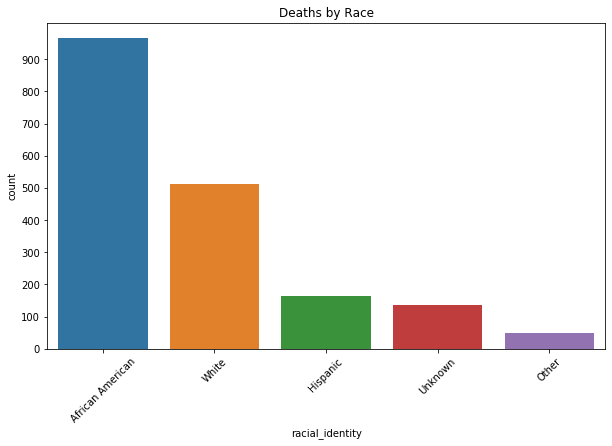

In [74]:
races = [i for i in race_df['racial_identity']]
plt.figure(figsize=(10,6))
plt.title('Deaths by Race')
race_plot = sns.barplot(x='racial_identity', y='count', data=race_df)
race_plot.set(yticks=np.arange(0, 1000, 100))
race_plot.set_xticklabels(races, rotation=45)
plt.show()

----------------

## Cases by Date

In [31]:
cases_date = pd.read_csv('./covid_cases_by_date.csv')
cases_date

,the_geom,the_geom_webmercator,collection_date,count,test_result,etl_timestamp
0,NaN,NaN,2020-08-26,3240,negative,2020-10-10 17:20:02
1,NaN,NaN,2020-03-31,768,negative,2020-10-10 17:20:02
2,NaN,NaN,2020-07-28,129,positive,2020-10-10 17:20:02
3,NaN,NaN,2020-05-11,1182,negative,2020-10-10 17:20:02
4,NaN,NaN,2020-09-21,103,positive,2020-10-10 17:20:02
...,...,...,...,...,...,...
422,NaN,NaN,2020-05-19,1602,negative,2020-10-10 17:20:02
423,NaN,NaN,2020-09-13,38,positive,2020-10-10 17:20:02
424,NaN,NaN,2020-10-04,106,positive,2020-10-10 17:20:02
425,NaN,NaN,2020-05-30,1540,negative,2020-10-10 17:20:02


In [32]:
cases_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   the_geom              0 non-null      float64
 1   the_geom_webmercator  0 non-null      float64
 2   collection_date       427 non-null    object 
 3   count                 427 non-null    int64  
 4   test_result           427 non-null    object 
 5   etl_timestamp         427 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 20.1+ KB


In [33]:
# Add months to the data set and group by month to get a month by month analysis.
months = []
for i in cases_date['collection_date']:
    months.append(datetime.datetime.strptime(i, "%Y-%m-%d").month)

month_names = []
for i in months:
    month_names.append(calendar.month_abbr[i])

cases_date['month'] = month_names

new_cases_date = cases_date.groupby(['month', 'test_result'], as_index=False).sum()
new_cases_date.drop(['the_geom', 'the_geom_webmercator'], axis=1, inplace=True)
new_cases_date

,month,test_result,count
0,Apr,negative,25087
1,Apr,positive,12906
2,Aug,negative,83500
3,Aug,positive,3631
4,Jul,negative,74585
5,Jul,positive,4314
6,Jun,negative,52372
7,Jun,positive,3474
8,Mar,negative,6705
9,Mar,positive,3202


In [34]:
# Set and reorder months
months_order = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
new_cases_date['month'] = pd.Categorical(new_cases_date['month'], categories=months_order, ordered=True)

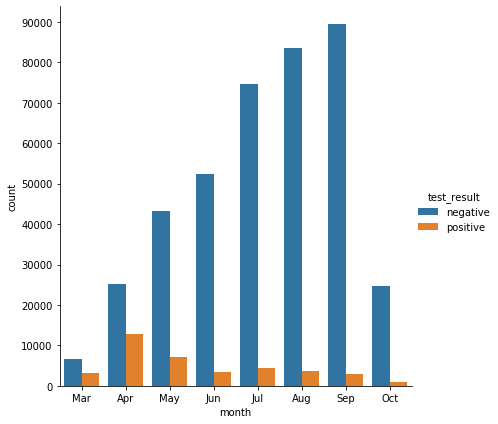

In [35]:
cases_date_plot = sns.catplot(x = "month", y = "count", hue = "test_result", data=new_cases_date, kind = "bar", height=6)
cases_date_plot.set(yticks = np.arange(0, 90001, 10000))
plt.show()

## Hospitalizations by Date

In [36]:
hosp_date = pd.read_csv('./covid_hospitalizations_by_date.csv')
hosp_date

,date,hospitalized,count,etl_timestamp
0,2020-09-16,NO_UNKNOWN,93,2020-10-10 17:20:02
1,2020-03-26,Yes,66,2020-10-10 17:20:02
2,2020-07-09,Yes,12,2020-10-10 17:20:02
3,2020-06-17,Yes,19,2020-10-10 17:20:02
4,2020-04-03,Yes,131,2020-10-10 17:20:02
...,...,...,...,...
380,2020-07-22,Yes,10,2020-10-10 17:20:02
381,2020-07-15,NO_UNKNOWN,152,2020-10-10 17:20:02
382,2020-09-29,NO_UNKNOWN,138,2020-10-10 17:20:02
383,2020-09-11,NO_UNKNOWN,95,2020-10-10 17:20:02


In [37]:
hosp_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           383 non-null    object
 1   hospitalized   385 non-null    object
 2   count          385 non-null    int64 
 3   etl_timestamp  385 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.2+ KB


In [38]:
hosp_date.sort_values('date') # Sorting shows the NaN, and tells us where the dataset ends and begins.
                              # We'll just assume these NaNs come from dates prior to data collection, 
                              # and thus give them the date '2020-03-01'.

,date,hospitalized,count,etl_timestamp
114,2020-03-14,NO_UNKNOWN,5,2020-10-10 17:20:02
17,2020-03-17,NO_UNKNOWN,13,2020-10-10 17:20:02
39,2020-03-18,NO_UNKNOWN,7,2020-10-10 17:20:02
174,2020-03-19,NO_UNKNOWN,27,2020-10-10 17:20:02
208,2020-03-19,Yes,5,2020-10-10 17:20:02
...,...,...,...,...
318,2020-10-06,NO_UNKNOWN,186,2020-10-10 17:20:02
30,2020-10-07,NO_UNKNOWN,203,2020-10-10 17:20:02
157,2020-10-08,NO_UNKNOWN,113,2020-10-10 17:20:02
204,NaN,Yes,12,2020-10-10 17:20:02


In [39]:
hosp_date['date'].fillna('2020-03-01', inplace=True)

In [40]:
# Add months to the data set and group by month to get a month by month analysis.
months = []
for i in hosp_date['date']:
    months.append(datetime.datetime.strptime(i, "%Y-%m-%d").month)

month_names = []
for i in months:
    month_names.append(calendar.month_abbr[i])

hosp_date['month'] = month_names

new_hosp_date = hosp_date.groupby(['month', 'hospitalized'], as_index=False).sum()

new_hosp_date.loc[new_hosp_date['hospitalized'] == 'NO_UNKNOWN', ['hospitalized']] = 'No_or_Unk'
new_hosp_date

,month,hospitalized,count
0,Apr,No_or_Unk,10272
1,Apr,Yes,3563
2,Aug,No_or_Unk,3392
3,Aug,Yes,298
4,Jul,No_or_Unk,3816
5,Jul,Yes,476
6,Jun,No_or_Unk,2750
7,Jun,Yes,556
8,Mar,No_or_Unk,1525
9,Mar,Yes,514


#### This data shows no hospitalizations in October (as of 10/10/2020), possibly an error?

In [41]:
# Set and reorder months
new_hosp_date['month'] = pd.Categorical(new_hosp_date['month'], categories=months_order, ordered=True)

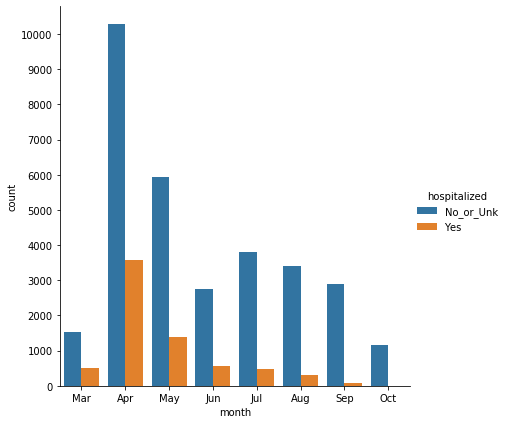

In [42]:
hosp_date_plot = sns.catplot(x = "month", y = "count", hue = "hospitalized", data=new_hosp_date, kind = "bar", height=6)
hosp_date_plot.set(yticks = np.arange(0, 10001, 1000))
plt.show()

## Deaths by Date

In [43]:
date_df = pd.read_csv('./covid_deaths_by_date.csv')
date_df

,clinical_date_of_death,covid_outcome,count,etl_timestamp
0,2020-06-16,DIED,6,2020-10-10 17:20:02
1,2020-05-25,DIED,13,2020-10-10 17:20:02
2,2020-06-09,DIED,6,2020-10-10 17:20:02
3,2020-05-03,DIED,25,2020-10-10 17:20:02
4,2020-06-13,DIED,7,2020-10-10 17:20:02
...,...,...,...,...
72,2020-05-20,DIED,14,2020-10-10 17:20:02
73,2020-05-21,DIED,10,2020-10-10 17:20:02
74,2020-04-08,DIED,26,2020-10-10 17:20:02
75,2020-05-24,DIED,8,2020-10-10 17:20:02


In [44]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   clinical_date_of_death  76 non-null     object
 1   covid_outcome           77 non-null     object
 2   count                   77 non-null     int64 
 3   etl_timestamp           77 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.5+ KB


In [45]:
# It appears that this data starts April 1st, 2020. Given that there is an NaN in the data, 
# I'm going to assume that those deaths are from March; I will fill this NaN with '2020-03-31'.
date_df['clinical_date_of_death'].fillna('2020-03-31', inplace=True)

In [46]:
# Add months to the data set and group by month to get a month by month analysis.
months = []
for i in date_df['clinical_date_of_death']:
    months.append(datetime.datetime.strptime(i, "%Y-%m-%d").month)

month_names = []
for i in months:
    month_names.append(calendar.month_abbr[i])

date_df['month'] = month_names

month_df = date_df.groupby('month', as_index=False).sum()
month_df

,month,count
0,Apr,918
1,Jul,6
2,Jun,125
3,Mar,19
4,May,530


In [47]:
# Set and reorder months
month_df = month_df.loc[[3, 0, 4, 2, 1], :]

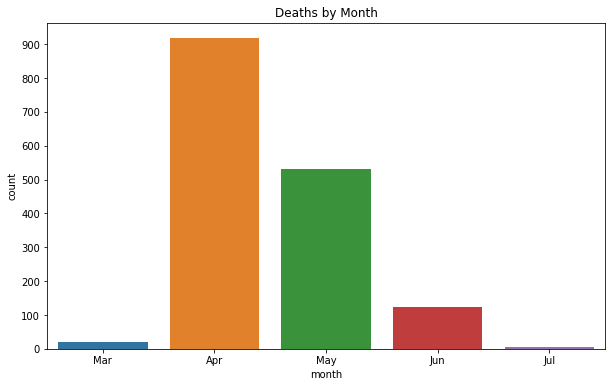

In [48]:
plt.figure(figsize=(10,6))
plt.title('Deaths by Month')
date_plot = sns.barplot(x='month', y='count', data=month_df)
date_plot.set(yticks=np.arange(0, 1000, 100))
plt.show()

In [49]:
print('Age data total deaths =', age_df['count'].sum())
print('Race data total deaths =', race_df['count'].sum())
print('Date data total deaths =',date_df['count'].sum())

Age data total deaths = 1822
Race data total deaths = 1827
Date data total deaths = 1598


Some discrepencies in the total death counts. Perhaps related to data collection issues?